looking into the titles of individual articles with certain features

In [28]:
import logging
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus, textcorpus
import numpy as np
from gensim.matutils import hellinger
import time
import pickle
import pyLDAvis
import matplotlib.pyplot as plt
import os
from scipy.stats import entropy

from IPython.core.debugger import set_trace


In [5]:
# load data
doc_year = [167,196,156,207,249,404,378,
271,
201,
768,
673,
823,
431,
681,
498,
597,
464,
657]

doc_ids =[0]+list(np.cumsum(doc_year))


alldata_new = pickle.load(open('output/20topics_newpreprocess_dict.p', 'rb'))
term_topic = alldata_new['term_topic']# term_topic is n_years*n_topics*n_terms
term_frequency = alldata_new['term_frequency']#term_frequency is n_years*n_terms
terms = alldata_new['terms']#terms is n_terms
doc_topicyrs = alldata_new['doc_topic']

doc_topic = []
doc_length=[]
for year in range(len(term_topic)):    
    doc_topic.append(alldata_new['doc_topic'][doc_ids[year]:doc_ids[year+1]])# doc_topic is nyear*n_docs given year*n_topics
    doc_length.append(alldata_new['doc_length'][doc_ids[year]:doc_ids[year+1]]) #doc_length is nyear*n_docs given year
    
# rename topics by their top freq word
topics = range(term_topic.shape[1])

def topic_label(topic, term_topic, terms):
    term_freqs = np.sum(term_topic[:,topic,:], axis = 0)
    max_term = np.argsort(-term_freqs)[0]
    return(terms[max_term])


topic_labels = [topic_label(topic, term_topic, terms) for topic in topics]
import pandas as pd

with open('output/all_visdtm.p','br') as f:
    allvisdtm=pickle.load(f)
for visdtm in allvisdtm:

    visdtm[0]['topiclabel']=topic_labels
#topic_labels

In [ ]:
# feature1: most typical article of each topics
with open('highest_freq.txt','w') as f:
    for kt in range(len(topic_labels)):
        f.write('\n'+topic_labels[kt]+'\n')        
        for year in range(len(doc_topic)):  
            topicfreq=np.array(doc_topic[year]).T[kt]
            idx=np.argmax(topicfreq)
            title=gettitle(year,idx)
            
            f.write(str(year+2000)+': '+title+'\n')

In [38]:
# feature2: "purest" / "most chaotic paper" 
maxen=0

with open('maxmin_entropy.txt','w') as f:
    for year in range(len(doc_topic)):  
        f.writelines('\n'+str(year+2000)+':\n')
        alldocs = doc_topic[year]
        allentrop=[]
        for d in alldocs:
            allentrop.append(entropy(d))
        # rank them
        maxE = np.argmax(allentrop)
        minE = np.argmin(allentrop)
        f.writelines('max:'+gettitle(year,maxE)+'\n')
        f.writelines('min:'+gettitle(year,minE)+'\n')
        
        # max entropy across years?
        if maxE>maxen:
            maxen=maxE
            maxtitle=gettitle(year,maxE)
print(maxtitle)

The Effect of Objecthood on Processing Efficiency


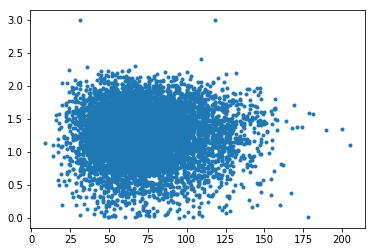

In [37]:
# does entropy correlate with length of title?
alltitlen=[]
allentrop=[]
for year in range(len(doc_topic)):  
    alldocs = doc_topic[year]
    for d in alldocs:
        allentrop.append(entropy(d))
    for idx in range(len(alldocs)):
        alltitlen.append(len(gettitle(year,idx)))
plt.plot(alltitlen,allentrop,'.')
plt.show()



In [20]:
def gettitle(year,idx): # code in line with generate_dtm_input.py to make sure the order of documents are the same
    if year<18: #i.e. year in the range of 0-17, the relative order
        year= 22+year # turn it into 22-39 -- folders named that way.
    thedir = 'text_data/volume_{}/'.format(year) #TODO: makesure, text_data_new is the same as text_data
    fnames = os.listdir(thedir)
    return fnames[idx][:-4]

In [15]:
for kt in range(len(topic_labels)):
    print(len(doc))

18